In [89]:
import pandas as pd


Ограничения на выгрузку записей справочника "Скважины" на стороне КССС. Скважина может быть выгружена, если в связанном справочнике "Связи Скважин и Компаний" есть хотя бы одна запись, у которой:
1) поле "Скважина"(WELL_ID) заполненно ссылкой на выгружаемую запись из справочника "Скважины" 
2) поле "Компания, получившая лицензию"(COMPANY_ID) заполнено ссылкой на запись из справочника "КОНТРАГЕНТЫ" или "Особые группы компаний", для которой есть запись в справочнике "Иерархии компаний по правилам формирования ИС" с заполненным полем "Квалификатор иерархии (дерева) организаций в ИС" (COMPANY_GROUP_SPECIAL_ID) = 5687138 (Иерархия предприятий УР OIS (УР OIS)).
Зависимая выгрузка справочника "Связи Скважин и Компаний" и справочника "Скважины":  
При создании записей справочника "Связи Скважин и Компаний", первыми на выгрузку идут связанные записи справочника "Скважины".

In [90]:
ier = pd.read_excel('Иерархия.xlsx')

In [91]:
ier_ois = ier[(ier['COMPANY_GROUP_SPECIAL_ID'] == '5687138') ]

In [92]:
skv = pd.read_excel('скважины.xlsx')

In [93]:
ogc = pd.read_excel('Связь скважин и компаний.xlsx')

In [95]:
for_ois = ier_ois['CONTRAGENT_ID']

In [96]:
ogc_ois = ogc[ogc['COMPANY_ID'].isin(for_ois)]

In [97]:
wells_for_ois = ogc_ois['WELL_ID']

In [98]:
skv_ois = skv[skv['WELL_ID'].isin(wells_for_ois)]

In [99]:
skv_ois

,WELL_ID,FIELD_ID,FIELD_NAME,FIELD_AREA_ID,FIELD_AREA_NAME,PROSPECT_ID,PROSPECT_NAME,BASIN_ID,BASIN_NAME,WELL_UWI,...,WELL_INV_NUMBER,LIFT_NUM,PS_WELL,BOREHOLE,NGDO,TPP,CITS,CDNG,START_DATE,END_DATE
1,1,15,"Ватьеганское, Западно-Сибирская НГП, Ханты-Ман...",1812965,Ватьеганская,782,"Западно-Сибирская НГП, Ватьеганская",240,Западно-Сибирская НГП,060317510_08039_,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2,100,15,"Ватьеганское, Западно-Сибирская НГП, Ханты-Ман...",1812965,Ватьеганская,782,"Западно-Сибирская НГП, Ватьеганская",240,Западно-Сибирская НГП,060317559_08452_,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
7,1000,249,"Усинское, Харьяга-Усинский НГР, Усинск",NaN,NaN,NaN,NaN,391,Харьяга-Усинский НГР,1400100513000220000,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
8,10000,305,"Южно-Ягунское, Западно-Сибирская НГП, Ханты-Ма...",1812959,Южно-Ягунская,1281,"Сургутский НГР, Южно-Ягунская",240,Западно-Сибирская НГП,067293336_05282_,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
9,100000,444,"Юрчукское, Волго-Уральская НГП, Соликамский",1521900,Южно-Юрчукская,NaN,NaN,394,Волго-Уральская НГП,001900020001_000761,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121260,9995,305,"Южно-Ягунское, Западно-Сибирская НГП, Ханты-Ма...",1812959,Южно-Ягунская,1281,"Сургутский НГР, Южно-Ягунская",240,Западно-Сибирская НГП,067293336_05275_,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
121261,9996,305,"Южно-Ягунское, Западно-Сибирская НГП, Ханты-Ма...",1812959,Южно-Ягунская,1281,"Сургутский НГР, Южно-Ягунская",240,Западно-Сибирская НГП,067293336_05276_,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
121262,9997,305,"Южно-Ягунское, Западно-Сибирская НГП, Ханты-Ма...",1812959,Южно-Ягунская,1281,"Сургутский НГР, Южно-Ягунская",240,Западно-Сибирская НГП,067293336_05277_,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
121274,9998,305,"Южно-Ягунское, Западно-Сибирская НГП, Ханты-Ма...",1812959,Южно-Ягунская,1281,"Сургутский НГР, Южно-Ягунская",240,Западно-Сибирская НГП,067293336_05279_,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
skv_ois.to_excel('output.xlsx', sheet_name='Sheet1', index=False)

In [117]:
kls = pd.read_excel('классы.xlsx')

In [119]:
sbl = pd.read_excel('шаблоны.xlsx')

In [120]:
result = pd.merge(kls,sbl, on = 'Hierarchy_MTR_Class', how = 'left')

In [121]:
result

,Hierarchy_MTR_Class,Hierarchy_MTR_Name,CSCD_ID,SHORT_NAME/ru_RU,SHORT_NAME/en_US,AUTO_SHORT_NAME,FULL_NAME/ru_RU,FULL_NAME/en_US,AUTO_FULL_NAME,FULL_NAME_NTD/ru_RU,...,MAIN_PRODUCT,BELONGING_TO_MAIN_PRODUCT,NO_SALE_MINOR,NPRD_DUTY_CATEGORY,NPRD_DUTY_CATEGORY_EXCEPTION,NPRD_DUTY_CATEGORY_ACTUAL,MP_ALLOWED,CTM,Item_creation_date,shablon
0,2004020101990000,Нефтегазосепараторы прочие,6043894,Сепаратор газа топливного 82-V-1020,NaN,Сепаратор газа топливного 82-V-1020,Сепаратор газа топливного 82-V-1020,NaN,Сепаратор газа топливного 82-V-1020,NaN,...,False,NaN,False,NaN,NaN,NaN,NaN,False,21.04.2025,102220
1,2004020101990000,Нефтегазосепараторы прочие,6043895,Сепаратор газа кислого 34-V-9002,NaN,Сепаратор газа кислого 34-V-9002,Сепаратор газа кислого 34-V-9002,NaN,Сепаратор газа кислого 34-V-9002,NaN,...,False,NaN,False,NaN,NaN,NaN,NaN,False,21.04.2025,102220
2,2004039900000000,Емкости прочие,6043932,Бункер разгрузочный 400 4м3,NaN,Бункер разгрузочный 400 4м3,Бункер разгрузочный 400 4м3,NaN,Бункер разгрузочный 400 4м3,NaN,...,False,NaN,False,NaN,NaN,NaN,NaN,False,21.04.2025,102221
3,2004020101990000,Нефтегазосепараторы прочие,6043896,Сепаратор газа кислого 34-V-9001,NaN,Сепаратор газа кислого 34-V-9001,Сепаратор газа кислого 34-V-9001,NaN,Сепаратор газа кислого 34-V-9001,NaN,...,False,NaN,False,NaN,NaN,NaN,NaN,False,21.04.2025,102220
4,2004020101990000,Нефтегазосепараторы прочие,6043897,Сепаратор газа факельного Е-1,NaN,Сепаратор газа факельного Е-1,Сепаратор газа факельного Е-1,NaN,Сепаратор газа факельного Е-1,NaN,...,False,NaN,False,NaN,NaN,NaN,NaN,False,21.04.2025,102220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,2004020101990000,Нефтегазосепараторы прочие,6043891,Сепаратор газа 83-V-0306,NaN,Сепаратор газа 83-V-0306,Сепаратор газа 83-V-0306,NaN,Сепаратор газа 83-V-0306,NaN,...,False,NaN,False,NaN,NaN,NaN,NaN,False,21.04.2025,102220
525,2004039900000000,Емкости прочие,6043930,Емкость сбора конденсата Е-101 20м3,NaN,Емкость сбора конденсата Е-101 20м3,Емкость сбора конденсата Е-101 20м3,NaN,Емкость сбора конденсата Е-101 20м3,NaN,...,False,NaN,False,NaN,NaN,NaN,NaN,False,21.04.2025,102221
526,2004020101990000,Нефтегазосепараторы прочие,6043892,Сепаратор газа 83-V-0307,NaN,Сепаратор газа 83-V-0307,Сепаратор газа 83-V-0307,NaN,Сепаратор газа 83-V-0307,NaN,...,False,NaN,False,NaN,NaN,NaN,NaN,False,21.04.2025,102220
527,2004020101990000,Нефтегазосепараторы прочие,6043893,Сепаратор газа хвостового V-602,NaN,Сепаратор газа хвостового V-602,Сепаратор газа хвостового V-602,NaN,Сепаратор газа хвостового V-602,NaN,...,False,NaN,False,NaN,NaN,NaN,NaN,False,21.04.2025,102220


In [124]:
cols = result.columns.to_list()
cols

['Hierarchy_MTR_Class',
 'Hierarchy_MTR_Name',
 'CSCD_ID',
 'SHORT_NAME/ru_RU',
 'SHORT_NAME/en_US',
 'AUTO_SHORT_NAME',
 'FULL_NAME/ru_RU',
 'FULL_NAME/en_US',
 'AUTO_FULL_NAME',
 'FULL_NAME_NTD/ru_RU',
 'FULL_NAME_NTD/en_US',
 'MODEL/ru_RU',
 'MODEL/en_US',
 'MATERIAL_MARK',
 'KEY_WORD/ru_RU',
 'KEY_WORD/en_US',
 'BASE_UNIT',
 'MSEHI',
 'MSEHL',
 'LUKOIL_MATERIAL',
 'TMC_Stat',
 'TMC_Type',
 'TMC_Kind',
 'TMC_Kind_Exception',
 'TMC_KIND_ACTUAL_NAME',
 'ACTUAL_RECORD',
 'GROUP_MATERIAL',
 'GROUP_MATERIAL_NAME',
 'EXCISE_GROUP',
 'EXCISE_GROUP_NAME',
 'CRUDE_OIL_MATERIALS',
 'EXCISE_GOODS_IN_CHECK',
 'PRODUCER',
 'PRODUCER_NAME',
 'LUKOIL_CODE',
 'REGULATORY_DOC_NAME',
 'MATERIAL_NTD',
 'TECH_DESCRIPTION',
 'Hierarchy_SBIT_Class',
 'Hierarchy_SBIT_Name',
 'Hierarchy_TNVED_Class',
 'Hierarchy_TNVED_Name',
 'TN_VED_OTHERS',
 'Hierarchy_OKPD2_Class',
 'Hierarchy_OKPD2_Name',
 'Hierarchy_OKVED2_Class',
 'Hierarchy_OKVED2_Name',
 'Hierarchy_UBM_Class',
 'Hierarchy_UBM_Name',
 'BRAND_OIL',
 

In [130]:
result2 = result[['Hierarchy_MTR_Class','shablon','CSCD_ID','SHORT_NAME/ru_RU','SHORT_NAME/en_US']]

In [131]:
result2

,Hierarchy_MTR_Class,shablon,CSCD_ID,SHORT_NAME/ru_RU,SHORT_NAME/en_US
0,2004020101990000,102220,6043894,Сепаратор газа топливного 82-V-1020,NaN
1,2004020101990000,102220,6043895,Сепаратор газа кислого 34-V-9002,NaN
2,2004039900000000,102221,6043932,Бункер разгрузочный 400 4м3,NaN
3,2004020101990000,102220,6043896,Сепаратор газа кислого 34-V-9001,NaN
4,2004020101990000,102220,6043897,Сепаратор газа факельного Е-1,NaN
...,...,...,...,...,...
524,2004020101990000,102220,6043891,Сепаратор газа 83-V-0306,NaN
525,2004039900000000,102221,6043930,Емкость сбора конденсата Е-101 20м3,NaN
526,2004020101990000,102220,6043892,Сепаратор газа 83-V-0307,NaN
527,2004020101990000,102220,6043893,Сепаратор газа хвостового V-602,NaN


In [138]:
import pandas as pd
from bs4 import BeautifulSoup

# Загрузка CSV
df = pd.read_excel('export.xlsx')

def parse_xml_column(xml_str):
    if pd.isna(xml_str) or xml_str.strip() == '':
        return {}

    soup = BeautifulSoup(xml_str, 'html.parser')

    result = {}
    # перебираем все строки таблицы
    for tr in soup.find_all('tr'):
        tds = tr.find_all('td')
        if len(tds) >= 2:
            # ключ — текст из <b> внутри первого <td>, без двоеточия
            key_tag = tds[0].find('b')
            if key_tag:
                key = key_tag.get_text(strip=True).rstrip(':')
                # значение — текст из второго <td>
                value = tds[1].get_text(strip=True)
                result[key] = value
    return result

# Разбор столбцов N34306 и N52205
for col in ['N34306', 'N52205']:
    parsed_data = df[col].apply(parse_xml_column)
    # превращаем dict-столбцы в датафреймы и добавляем с префиксом колонки
    parsed_df = pd.json_normalize(parsed_data).add_prefix(f'{col}_')
    df = pd.concat([df, parsed_df], axis=1)

# Можно удалить исходные колонки, если нужно
# df = df.drop(columns=['N34306', 'N52205'])

df.head(25)


c:\Users\ZubarevVV\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,ALL_ID,KSSS_ID,N2889,N2864,N34306,N52205,N34306_Код КССС ТРУ,N34306_№ п/п ТРУ,N34306_Перечень ТРУ,N52205_Код КССС ТРУ,N52205_№ п/п ТРУ,N52205_Перечень ТРУ
0,3612207,3612207,False,False,<table style='border: 1px solid'><tr><td style...,NaN,832»4»611. Продовольственные товары,611.,NaN,NaN,NaN,NaN
1,3612207,3612207,False,False,<table style='border: 1px solid'><tr><td style...,NaN,2656»4»656. Продовольственные товары,656,NaN,NaN,NaN,NaN
2,3040308,3040308,False,False,<table style='border: 1px solid'><tr><td style...,NaN,832»4»611. Продовольственные товары,611.,NaN,NaN,NaN,NaN
3,3040308,3040308,False,False,<table style='border: 1px solid'><tr><td style...,NaN,2656»4»656. Продовольственные товары,656,NaN,NaN,NaN,NaN
4,2377029,2377029,False,False,<table style='border: 1px solid'><tr><td style...,NaN,2656»4»656. Продовольственные товары,656,NaN,NaN,NaN,NaN
5,6095555,2377233,False,False,<table style='border: 1px solid'><tr><td style...,NaN,2523»1»523. Специальная одежда,523,NaN,NaN,NaN,NaN
6,6095556,2377235,False,True,<table style='border: 1px solid'><tr><td style...,NaN,2523»1»523. Специальная одежда,523,NaN,NaN,NaN,NaN
7,2129430,2129430,False,False,<table style='border: 1px solid'><tr><td style...,NaN,779»1»574. Спецодежда,574.,1</td,NaN,NaN,NaN
8,2129430,2129430,False,False,<table style='border: 1px solid'><tr><td style...,<table style='border: 1px solid'><tr><td style...,2523»1»523. Специальная одежда,523,NaN,2523»1»523. Специальная одежда,523,NaN
9,2377018,2377018,False,False,<table style='border: 1px solid'><tr><td style...,NaN,2656»4»656. Продовольственные товары,656,NaN,NaN,NaN,NaN


In [5]:
import os
import pandas as pd
from openpyxl import load_workbook

# Укажите путь к папке с файлами
folder_path = 'Данные'

# Итоговый датафрейм
result_df = pd.DataFrame(columns=['Файл', 'Значение Краткое наименование','Значение Полное наименование'])

for root, dirs, files in os.walk(folder_path):  # перебор всех подпапок
    for file in files:
        if file.endswith(('.xlsx', '.xlsm', '.xls')):
            file_path = os.path.join(root, file)
            try:
                wb = load_workbook(file_path, read_only=True, data_only=True)
                
                # Ищем лист с подстрокой "Эталонные данные" в названии
                sheet_name = None
                for sheet in wb.sheetnames:
                    if "Эталонные записи" in sheet:
                        sheet_name = sheet
                        break
                
                if sheet_name is None:
                    print(f'В файле {file} лист с "Эталонные записи" не найден. Пропускаем.')
                    continue
                
                ws = wb[sheet_name]
                
                # Находим строку с "Краткое наименование нормализованное" в 3-м столбце (столбец C)
                found_row = None
                for row in ws.iter_rows(min_col=3, max_col=3):
                    cell = row[0]
                    if cell.value == "Краткое наименование нормализованное":
                        found_row = cell.row
                        break
                
                if found_row is None:
                    print(f'В листе {sheet_name} файла {file} не найдена ячейка с "Краткое наименование нормализованное". Пропускаем.')
                    continue
                
                # Собираем все значения ниже найденной ячейки в столбце 3
                values = []
                current_row = found_row + 2
                while True:
                    cell_value = ws.cell(row=current_row, column=3).value
                    if cell_value is None:
                        break
                    values.append(cell_value)
                    current_row += 1

                # Находим строку с "Полное наименование нормализованное" в 5-м столбце (столбец C)
                found_row = None
                for row in ws.iter_rows(min_col=5, max_col=5):
                    cell = row[0]
                    if cell.value == "Полное наименование нормализованное":
                        found_row = cell.row
                        break
                
                if found_row is None:
                    print(f'В листе {sheet_name} файла {file} не найдена ячейка с "Полное наименование нормализованное". Пропускаем.')
                    continue
                
                # Собираем все значения ниже найденной ячейки в столбце 3
                values_full = []
                current_row = found_row + 2
                while True:
                    cell_value = ws.cell(row=current_row, column=5).value
                    if cell_value is None:
                        break
                    values_full.append(cell_value)
                    current_row += 1
                
                # Добавляем данные в итоговый датафрейм
                df_temp = pd.DataFrame({
                    'Файл': [file]*len(values),
                    'Значение Краткое наименование': values,
                    'Значение Полное наименование': values_full
                })
                result_df = pd.concat([result_df, df_temp], ignore_index=True)
            except Exception as e:
                print(f'Ошибка в файле {file}: {e}')

# Сохраняем итоговый датафрейм в Excel
output_path = os.path.join(folder_path, 'собранные_данные2.xlsx')
result_df.to_excel(output_path, index=False)
print(f'Сбор данных завершён. Результат сохранён в {output_path}')



В файле StandartnyjotcetvEXCELTMCiuslugi_1751543289099.xlsx лист с "Эталонные записи" не найден. Пропускаем.


c:\Users\ZubarevVV\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


В файле TMCiuslugi_12.07.2025 10.42.52.xlsx лист с "Эталонные записи" не найден. Пропускаем.
В файле StandartnyjotcetvEXCELTMCiuslugi_1751550737220.xlsx лист с "Эталонные записи" не найден. Пропускаем.
В файле StandartnyjotcetvEXCELTMCiuslugi_1752672014801.xlsx лист с "Эталонные записи" не найден. Пропускаем.
В файле TMCiuslugi_07.07.2025 16.14.29.xlsx лист с "Эталонные записи" не найден. Пропускаем.
В файле TMCiuslugi_16.07.2025 16.44.34.xlsx лист с "Эталонные записи" не найден. Пропускаем.
В файле TMCiuslugi_07.07.2025 15.11.59.xlsx лист с "Эталонные записи" не найден. Пропускаем.
В файле TMCiuslugi_18.06.2025 09.54.45.xlsx лист с "Эталонные записи" не найден. Пропускаем.
В файле TMCiuslugi_01.07.2025 13.25.21.xlsx лист с "Эталонные записи" не найден. Пропускаем.
В файле TMCiuslugi_03.07.2025 09.52.31.xlsx лист с "Эталонные записи" не найден. Пропускаем.
В файле TMCiuslugi_12.07.2025 10.48.00.xlsx лист с "Эталонные записи" не найден. Пропускаем.
В файле TMCiuslugi_01.07.2025 13.06.10

In [9]:
import os
import pandas as pd
from openpyxl import load_workbook

# Укажите путь к папке с файлами
folder_path = 'Данные'

# Итоговый датафрейм
result_df = pd.DataFrame(columns=['Файл', 'Значение Краткое наименование', 'Значение Полное наименование'])

# Список для хранения сообщений об ошибках
log_messages = []

for root, dirs, files in os.walk(folder_path):  # перебор всех подпапок
    for file in files:
        if file.endswith(('.xlsx', '.xlsm', '.xls')):
            file_path = os.path.join(root, file)
            try:
                wb = load_workbook(file_path, read_only=True, data_only=True)

                # Ищем лист с подстрокой "Эталонные записи" в названии
                sheet_name = None
                for sheet in wb.sheetnames:
                    if "Эталонные записи" in sheet:
                        sheet_name = sheet
                        break

                if sheet_name is None:
                    msg = f'В файле {file} лист с "Эталонные записи" не найден. Пропускаем.'
                    print(msg)
                    log_messages.append(msg)
                    continue

                ws = wb[sheet_name]

                # Находим строку с "Краткое наименование нормализованное" в 3-м столбце (столбец C)
                found_row = None
                for row in ws.iter_rows(min_col=3, max_col=3):
                    cell = row[0]
                    if cell.value == "Краткое наименование нормализованное":
                        found_row = cell.row
                        break

                if found_row is None:
                    msg = f'В листе {sheet_name} файла {file} не найдена ячейка с "Краткое наименование нормализованное". Пропускаем.'
                    print(msg)
                    log_messages.append(msg)
                    continue

                values = []
                current_row = found_row + 2
                while True:
                    cell_value = ws.cell(row=current_row, column=3).value
                    if cell_value is None:
                        if current_row == found_row + 2:
                            msg = f'В листе {sheet_name} файла {file} нет записей "Краткое наименование нормализованное".'
                            print(msg)
                            log_messages.append(msg)
                        break
                    values.append(cell_value)
                    current_row += 1

                # Находим строку с "Полное наименование нормализованное" в 5-м столбце (столбец E)
                found_row = None
                for row in ws.iter_rows(min_col=5, max_col=5):
                    cell = row[0]
                    if cell.value == "Полное наименование нормализованное":
                        found_row = cell.row
                        break

                if found_row is None:
                    msg = f'В листе {sheet_name} файла {file} не найдена ячейка с "Полное наименование нормализованное". Пропускаем.'
                    print(msg)
                    log_messages.append(msg)
                    continue

                values_full = []
                current_row = found_row + 2
                while True:
                    cell_value = ws.cell(row=current_row, column=5).value
                    if cell_value is None:
                        if current_row == found_row + 2:
                            msg = f'В листе {sheet_name} файла {file} нет записей "Полное наименование нормализованное".'
                            print(msg)
                            log_messages.append(msg)    
                        break
                    values_full.append(cell_value)
                    current_row += 1

                # Проверяем, чтобы длина списков совпадала
                min_len = min(len(values), len(values_full))
                if min_len == 0:
                    msg = f'В файле {file} нет данных для "Краткое наименование" или "Полное наименование". Пропускаем.'
                    print(msg)
                    log_messages.append(msg)
                    continue

                # Формируем итоговый датафрейм
                df_temp = pd.DataFrame({
                    'Файл': [file] * min_len,
                    'Значение Краткое наименование': values[:min_len],
                    'Значение Полное наименование': values_full[:min_len]
                })
                result_df = pd.concat([result_df, df_temp], ignore_index=True)

            except Exception as e:
                msg = f'Ошибка при обработке файла {file}: {e}'
                print(msg)
                log_messages.append(msg)

# Сохраняем итоговый датафрейм в Excel
output_path = os.path.join(folder_path, 'собранные_данные.xlsx')
result_df.to_excel(output_path, index=False)
print(f'Сбор данных завершён. Результат сохранён в {output_path}')

# Сохраняем логи в отдельный Excel файл
if log_messages:
    log_df = pd.DataFrame({'Сообщения': log_messages})
    log_path = os.path.join(folder_path, 'логи_обработки.xlsx')
    log_df.to_excel(log_path, index=False)
    print(f'Логи обработки сохранены в {log_path}')
else:
    print('Не обнаружено ошибок и предупреждений.')


В файле StandartnyjotcetvEXCELTMCiuslugi_1751543289099.xlsx лист с "Эталонные записи" не найден. Пропускаем.


c:\Users\ZubarevVV\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


В файле TMCiuslugi_12.07.2025 10.42.52.xlsx лист с "Эталонные записи" не найден. Пропускаем.
В файле StandartnyjotcetvEXCELTMCiuslugi_1751550737220.xlsx лист с "Эталонные записи" не найден. Пропускаем.
В файле StandartnyjotcetvEXCELTMCiuslugi_1752672014801.xlsx лист с "Эталонные записи" не найден. Пропускаем.
В файле TMCiuslugi_07.07.2025 16.14.29.xlsx лист с "Эталонные записи" не найден. Пропускаем.
В файле TMCiuslugi_16.07.2025 16.44.34.xlsx лист с "Эталонные записи" не найден. Пропускаем.
В файле TMCiuslugi_07.07.2025 15.11.59.xlsx лист с "Эталонные записи" не найден. Пропускаем.
В файле TMCiuslugi_18.06.2025 09.54.45.xlsx лист с "Эталонные записи" не найден. Пропускаем.
В файле TMCiuslugi_01.07.2025 13.25.21.xlsx лист с "Эталонные записи" не найден. Пропускаем.
В файле TMCiuslugi_03.07.2025 09.52.31.xlsx лист с "Эталонные записи" не найден. Пропускаем.
В файле TMCiuslugi_12.07.2025 10.48.00.xlsx лист с "Эталонные записи" не найден. Пропускаем.
В файле TMCiuslugi_01.07.2025 13.06.10

## TMC


In [1]:
import pandas as pd


In [2]:
skv = pd.read_excel('TMC.xlsx')

In [1]:
skv.head(10)

NameError: name 'skv' is not defined

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('default')
sns.set_palette("husl")

def load_dataframe_from_excel(file_path):
    """Загрузка датафрейма из Excel файла"""
    return pd.read_excel(file_path)

def analyze_tmc_stat(df):
    """Анализ статистики колонки TMC_Stat и построение диаграммы"""
    tmc_stat_counts = df['TMC_Stat'].value_counts()
    
    plt.figure(figsize=(10, 6))
    tmc_stat_counts.plot(kind='bar')
    plt.title('Статистика записей в колонке TMC_Stat')
    plt.xlabel('Категории TMC_Stat')
    plt.ylabel('Количество записей')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return tmc_stat_counts

def count_hierarchy_mtr_name(df):
    """Подсчет записей с подстрокой 'На блок' в Hierarchy_MTR_Name"""
    na_blok_count = df[df['Hierarchy_MTR_Name'].str.contains('На блок', na=False)].groupby('TMC_Stat').size()
    return na_blok_count

def create_etalon_dataframe(df):
    """Создание датафрейма etalon с записями содержащими эталонные подстроки"""
    etalon_mask = (df['COMMENT'].str.contains('Эталонная запись', na=False) | 
                   df['COMMENT'].str.contains('Эталонные записи', na=False))
    etalon = df[etalon_mask].copy()
    return etalon

def analyze_non_etalon_records(df, etalon):
    """Анализ записей не входящих в etalon"""
    non_etalon = df[~df.index.isin(etalon.index)]
    
    # Статистика по TMC_Type и TMC_Stat
    type_stat_counts = non_etalon.groupby(['TMC_Type', 'TMC_Stat']).size().unstack(fill_value=0)
    
    # Построение графика
    plt.figure(figsize=(12, 8))
    type_stat_counts.plot(kind='bar', stacked=True)
    plt.title('Распределение записей (не эталонные) по TMC_Type и TMC_Stat')
    plt.xlabel('TMC_Type')
    plt.ylabel('Количество записей')
    plt.xticks(rotation=45)
    plt.legend(title='TMC_Stat')
    plt.tight_layout()
    plt.show()
    
    return non_etalon, type_stat_counts

def analyze_etalon_records(etalon):
    """Анализ эталонных записей и поиск ошибок сборки"""
    # Сравнение колонок
    short_name_mismatch = etalon['SHORT_NAME/ru_RU'] != etalon['AUTO_SHORT_NAME']
    full_name_mismatch = etalon['FULL_NAME/ru_RU'] != etalon['AUTO_FULL_NAME']
    
    # Записи с несовпадающими значениями
    oshibka_sborki = etalon[short_name_mismatch | full_name_mismatch].copy()
    
    # Статистика ошибок
    error_stats = pd.DataFrame({
        'SHORT_NAME_mismatch': short_name_mismatch.sum(),
        'FULL_NAME_mismatch': full_name_mismatch.sum(),
        'Total_errors': len(oshibka_sborki)
    }, index=['Count'])
    
    # График статистики ошибок
    plt.figure(figsize=(8, 6))
    error_stats.T.plot(kind='bar', legend=False)
    plt.title('Статистика ошибок сборки в эталонных записях')
    plt.ylabel('Количество записей')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return oshibka_sborki, error_stats

def analyze_tru_sap_id(df):
    """Анализ колонки TRU_SAP_ID"""
    def count_values(cell):
        if pd.isna(cell):
            return 0
        return len(str(cell).split('|'))
    
    df['TRU_SAP_ID_count'] = df['TRU_SAP_ID'].apply(count_values)
    tru_sap_stats = df['TRU_SAP_ID_count'].value_counts().sort_index()
    
    # График распределения количества значений
    plt.figure(figsize=(10, 6))
    tru_sap_stats.plot(kind='bar')
    plt.title('Распределение количества значений в TRU_SAP_ID')
    plt.xlabel('Количество значений в ячейке')
    plt.ylabel('Количество записей')
    plt.tight_layout()
    plt.show()
    
    return df, tru_sap_stats

def analyze_tru_exception_sap_id(df):
    """Анализ колонки TRU_EXCEPTION_SAP_ID"""
    def count_values(cell):
        if pd.isna(cell):
            return 0
        return len(str(cell).split('|'))
    
    df['TRU_EXCEPTION_count'] = df['TRU_EXCEPTION_SAP_ID'].apply(count_values)
    tru_exception_stats = df['TRU_EXCEPTION_count'].value_counts().sort_index()
    
    # Создание датафрейма bad_tru_exception
    bad_tru_exception = df[df['TRU_EXCEPTION_count'] > 1].copy()
    
    # Проверка для записей с одним значением
    single_value_mask = df['TRU_EXCEPTION_count'] == 1
    single_value_records = df[single_value_mask]
    
    # Получение всех значений TRU_SAP_ID
    all_tru_sap_ids = set()
    for value in df['TRU_SAP_ID'].dropna():
        all_tru_sap_ids.update(str(value).split('|'))
    
    # Проверка наличия значений TRU_EXCEPTION_SAP_ID в TRU_SAP_ID
    missing_records = []
    for idx, row in single_value_records.iterrows():
        exception_value = str(row['TRU_EXCEPTION_SAP_ID']).strip()
        if exception_value not in all_tru_sap_ids:
            missing_records.append(idx)
    
    # Добавление записей с отсутствующими значениями в bad_tru_exception
    additional_bad_records = df.loc[missing_records]
    bad_tru_exception = pd.concat([bad_tru_exception, additional_bad_records]).drop_duplicates()
    
    # График распределения
    plt.figure(figsize=(10, 6))
    tru_exception_stats.plot(kind='bar')
    plt.title('Распределение количества значений в TRU_EXCEPTION_SAP_ID')
    plt.xlabel('Количество значений в ячейке')
    plt.ylabel('Количество записей')
    plt.tight_layout()
    plt.show()
    
    return df, bad_tru_exception, tru_exception_stats

def final_statistics(df, etalon, oshibka_sborki):
    """Финальная статистика по всем категориям"""
    # Добавление флагов
    df['is_etalon'] = df.index.isin(etalon.index)
    df['is_oshibka_sborki'] = df.index.isin(oshibka_sborki.index)
    
    # Группировка по всем требуемым колонкам
    final_stats = df.groupby([
        'Hierarchy_MTR_Class', 
        'Hierarchy_MTR_Name', 
        'TMC_Stat', 
        'TMC_Type',
        'is_etalon',
        'is_oshibka_sborki'
    ]).size().reset_index(name='count')
    
    return final_stats

def save_dataframes_to_excel(original_file_path, dataframes_dict):
    """Сохранение всех датафреймов в Excel файлы"""
    file_dir = os.path.dirname(original_file_path)
    file_name = os.path.splitext(os.path.basename(original_file_path))[0]
    
    for df_name, dataframe in dataframes_dict.items():
        output_path = os.path.join(file_dir, f"{df_name}.xlsx")
        dataframe.to_excel(output_path, index=False)
        print(f"Датафрейм '{df_name}' сохранен в: {output_path}")

def main_analysis(file_path):
    """Основная функция анализа"""
    print("Загрузка данных...")
    df = load_dataframe_from_excel(file_path)
    #df = skv
    print("1. Анализ TMC_Stat...")
    tmc_stat_counts = analyze_tmc_stat(df)
    
    print("2. Подсчет записей с 'На блок'...")
    na_blok_count = count_hierarchy_mtr_name(df)
    print("Записи с 'На блок' по категориям TMC_Stat:")
    print(na_blok_count)
    
    print("3. Создание датафрейма etalon...")
    etalon = create_etalon_dataframe(df)
    print(f"Найдено эталонных записей: {len(etalon)}")
    
    print("4. Анализ неэталонных записей...")
    non_etalon, type_stat_counts = analyze_non_etalon_records(df, etalon)
    
    print("5. Анализ ошибок сборки в эталонных записях...")
    oshibka_sborki, error_stats = analyze_etalon_records(etalon)
    print(f"Найдено записей с ошибками сборки: {len(oshibka_sborki)}")
    
    print("6. Анализ TRU_SAP_ID...")
    df, tru_sap_stats = analyze_tru_sap_id(df)
    
    print("7. Анализ TRU_EXCEPTION_SAP_ID...")
    df, bad_tru_exception, tru_exception_stats = analyze_tru_exception_sap_id(df)
    print(f"Найдено проблемных записей в TRU_EXCEPTION: {len(bad_tru_exception)}")
    
    print("8. Подготовка финальной статистики...")
    final_stats = final_statistics(df, etalon, oshibka_sborki)
    
    # Сбор всех датафреймов для сохранения
    dataframes_to_save = {
        'etalon': etalon,
        'oshibka_sborki': oshibka_sborki,
        'bad_tru_exception': bad_tru_exception,
        'final_statistics': final_stats,
        'non_etalon_records': non_etalon,
        'tmc_stat_analysis': pd.DataFrame(tmc_stat_counts).reset_index(),
        'tru_sap_analysis': pd.DataFrame(tru_sap_stats).reset_index(),
        'tru_exception_analysis': pd.DataFrame(tru_exception_stats).reset_index()
    }
    
    print("9. Сохранение датафреймов...")
    save_dataframes_to_excel(file_path, dataframes_to_save)
    
    print("\nАнализ завершен!")
    
    # Вывод сводной информации
    print(f"\nСводная информация:")
    print(f"Всего записей: {len(df)}")
    print(f"Эталонные записи: {len(etalon)}")
    print(f"Записи с ошибками сборки: {len(oshibka_sborki)}")
    print(f"Проблемные записи TRU_EXCEPTION: {len(bad_tru_exception)}")
    
    return df, dataframes_to_save




Загрузка данных...
1. Анализ TMC_Stat...


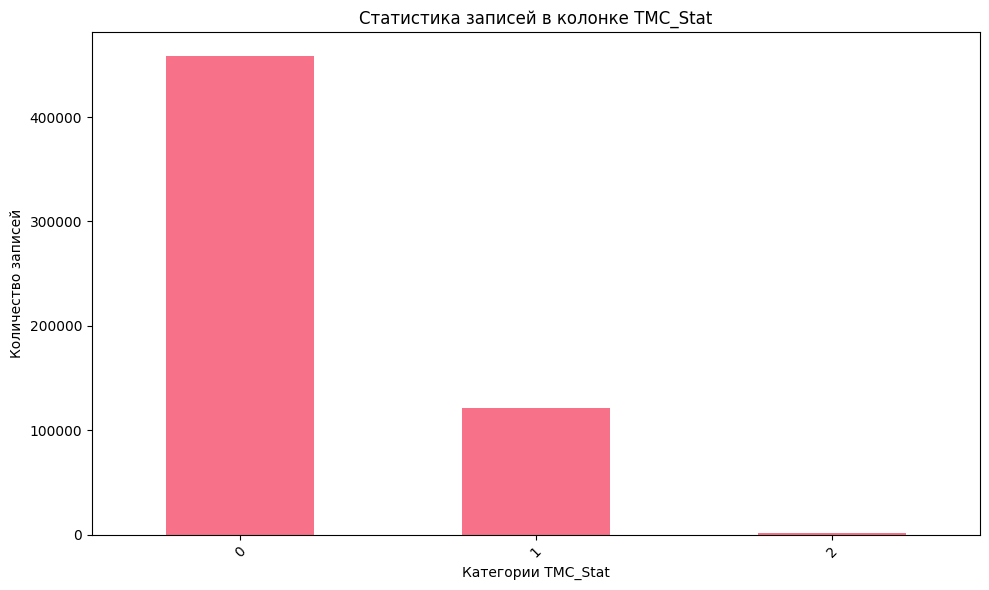

2. Подсчет записей с 'На блок'...
Записи с 'На блок' по категориям TMC_Stat:
Series([], dtype: int64)
3. Создание датафрейма etalon...
Найдено эталонных записей: 93594
4. Анализ неэталонных записей...


<Figure size 1200x800 with 0 Axes>

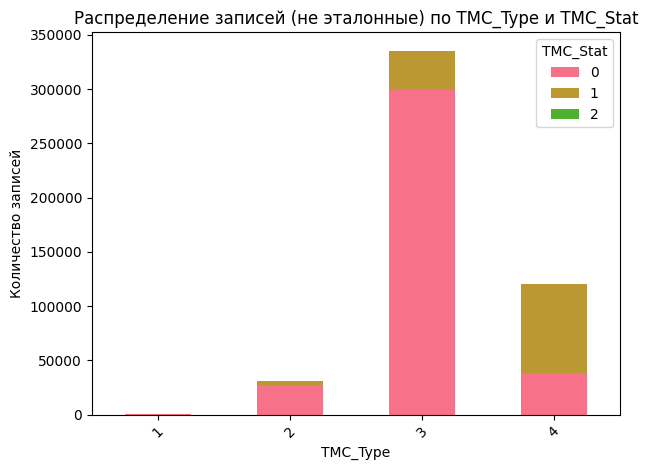

5. Анализ ошибок сборки в эталонных записях...


<Figure size 800x600 with 0 Axes>

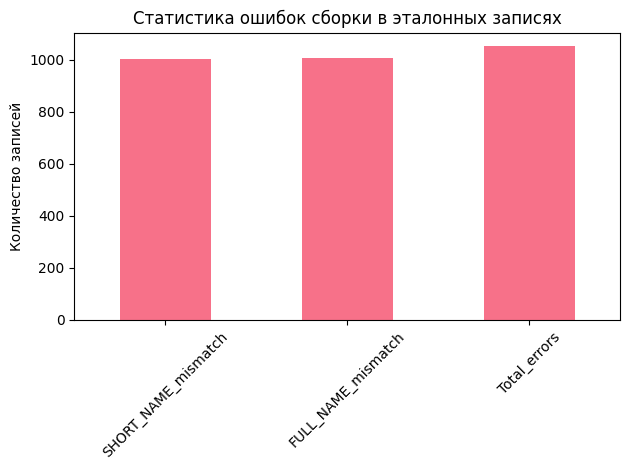

Найдено записей с ошибками сборки: 1051
6. Анализ TRU_SAP_ID...


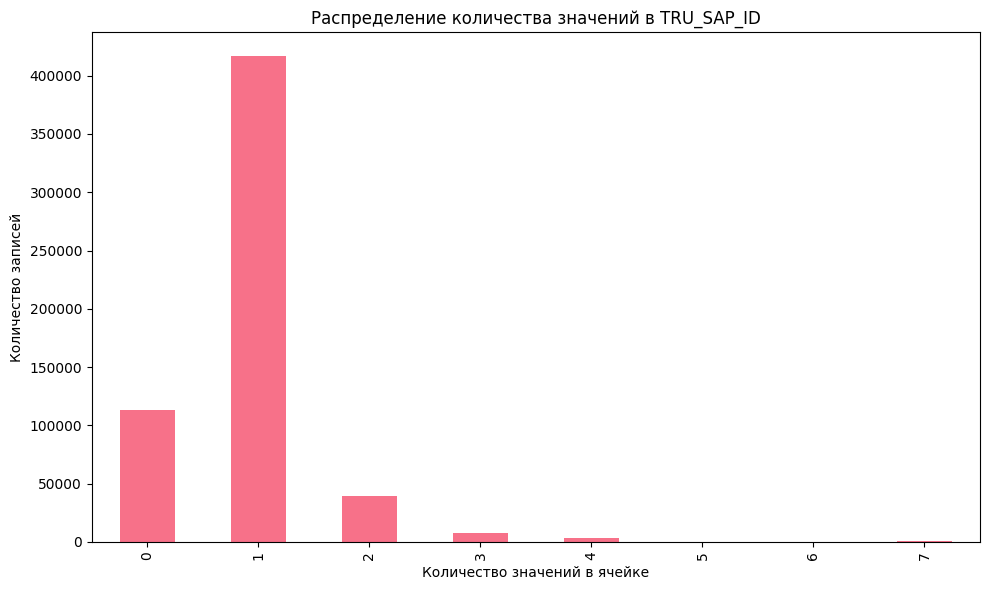

7. Анализ TRU_EXCEPTION_SAP_ID...


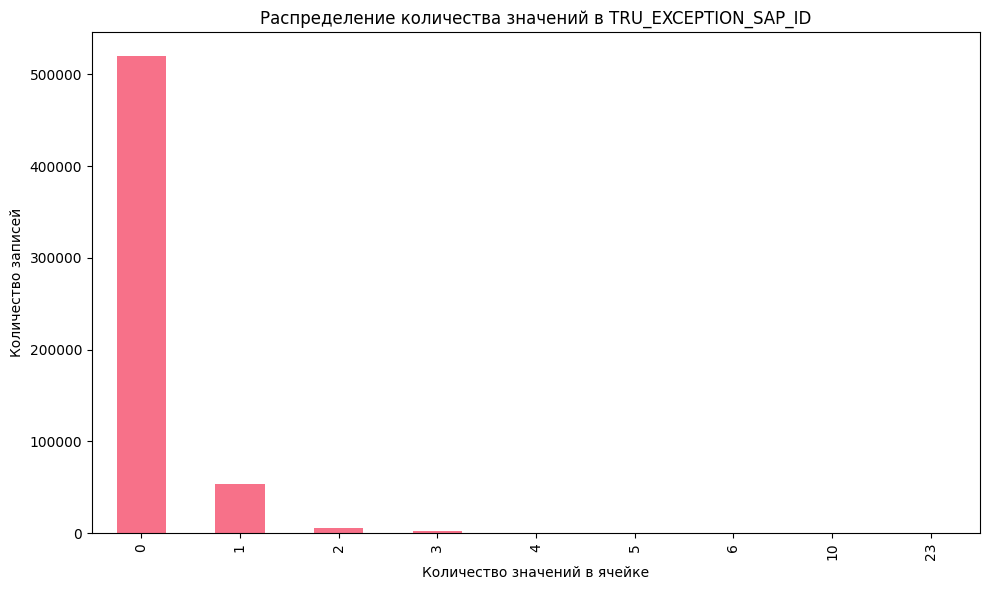

Найдено проблемных записей в TRU_EXCEPTION: 42491
8. Подготовка финальной статистики...
9. Сохранение датафреймов...
Датафрейм 'etalon' сохранен в: etalon.xlsx
Датафрейм 'oshibka_sborki' сохранен в: oshibka_sborki.xlsx
Датафрейм 'bad_tru_exception' сохранен в: bad_tru_exception.xlsx
Датафрейм 'final_statistics' сохранен в: final_statistics.xlsx


In [3]:
# Использование
if __name__ == "__main__":
    # Укажите путь к вашему Excel файлу
    file_path = "TMC.xlsx"
    
    try:
        result_df, all_dataframes = main_analysis(file_path)
    except Exception as e:
        print(f"Произошла ошибка: {e}")
        print("Проверьте путь к файлу и структуру данных")

In [ ]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения графиков
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

# Функция для добавления числовых значений на графики
def add_value_labels(ax, spacing=5):
    """Добавляет числовые значения на столбцы графика"""
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        
        if y_value > 0:  # Показываем только ненулевые значения
            label = f"{int(y_value)}"
            ax.annotate(label, (x_value, y_value), 
                       xytext=(0, spacing), 
                       textcoords="offset points", 
                       ha='center', va='bottom')

# Предполагаем, что датафрейм уже загружен в переменную df
print("=" * 80)
print("НАЧАЛО АНАЛИЗА ДАННЫХ")
print("=" * 80)
print(f"Размер датафрейма: {df.shape[0]} строк, {df.shape[1]} колонок")
print(f"Колонки в датафрейме: {list(df.columns)}")
print()

# 1. СТАТИСТИКА КОЛОНКИ TMC_Stat
print("1. СТАТИСТИКА КОЛОНКИ TMC_Stat")
print("-" * 50)

tmc_stat_counts = df['TMC_Stat'].value_counts()
tmc_stat_percentage = df['TMC_Stat'].value_counts(normalize=True) * 100

print(f"Всего уникальных категорий: {len(tmc_stat_counts)}")
print("\nРаспределение по категориям:")
for category, count in tmc_stat_counts.items():
    percentage = tmc_stat_percentage[category]
    print(f"  {category}: {count} записей ({percentage:.1f}%)")

# Столбчатая диаграмма для TMC_Stat
plt.figure(figsize=(12, 6))
ax = tmc_stat_counts.plot(kind='bar')
plt.title('Статистика записей в колонке TMC_Stat', fontsize=14, fontweight='bold')
plt.xlabel('Категории TMC_Stat', fontweight='bold')
plt.ylabel('Количество записей', fontweight='bold')
plt.xticks(rotation=45)

# Добавляем числовые значения
add_value_labels(ax)

plt.tight_layout()
plt.show()
print()

# 2. АНАЛИЗ ПОДСТРОКИ "НА БЛОК" В HIERARCHY_MTR_NAME
print("2. АНАЛИЗ ПОДСТРОКИ 'НА БЛОК' В HIERARCHY_MTR_NAME")
print("-" * 50)

# Проверяем наличие колонки
if 'Hierarchy_MTR_Name' in df.columns:
    na_blok_mask = df['Hierarchy_MTR_Name'].str.contains('На блок', na=False)
    na_blok_count = na_blok_mask.sum()
    na_blok_by_category = df[na_blok_mask].groupby('TMC_Stat').size()
    
    print(f"Всего записей с 'На блок': {na_blok_count} ({na_blok_count/len(df)*100:.1f}% от общего числа)")
    print("\nРаспределение по категориям TMC_Stat:")
    for category, count in na_blok_by_category.items():
        percentage = count/na_blok_count * 100 if na_blok_count > 0 else 0
        print(f"  {category}: {count} записей ({percentage:.1f}%)")
else:
    print("Колонка Hierarchy_MTR_Name не найдена в датафрейме")
print()

# 3. СОЗДАНИЕ ДАТАФРЕЙМА ETALON
print("3. СОЗДАНИЕ ДАТАФРЕЙМА ETALON")
print("-" * 50)

if 'COMMENT' in df.columns:
    etalon_mask = (df['COMMENT'].str.contains('Эталонная запись', na=False) | 
                   df['COMMENT'].str.contains('Эталонные записи', na=False))
    etalon = df[etalon_mask].copy()
    
    print(f"Найдено эталонных записей: {len(etalon)} ({len(etalon)/len(df)*100:.2f}% от общего числа)")
    
    if len(etalon) > 0:
        print("Распределение эталонных записей по TMC_Stat:")
        etalon_tmc_stat = etalon['TMC_Stat'].value_counts()
        for category, count in etalon_tmc_stat.items():
            percentage = count/len(etalon) * 100
            print(f"  {category}: {count} записей ({percentage:.1f}%)")
    else:
        print("Эталонные записи не найдены")
else:
    print("Колонка COMMENT не найдена в датафрейме")
    etalon = pd.DataFrame()
print()

# 4. АНАЛИЗ НЕЭТАЛОННЫХ ЗАПИСЕЙ
print("4. АНАЛИЗ НЕЭТАЛОННЫХ ЗАПИСЕЙ")
print("-" * 50)

if len(etalon) > 0:
    non_etalon = df[~df.index.isin(etalon.index)]
    print(f"Неэталонных записей: {len(non_etalon)} ({len(non_etalon)/len(df)*100:.2f}% от общего числа)")
    
    # Статистика по TMC_Type и TMC_Stat
    type_stat_counts = non_etalon.groupby(['TMC_Type', 'TMC_Stat']).size().unstack(fill_value=0)
    
    # График для неэталонных записей
    plt.figure(figsize=(14, 8))
    ax = type_stat_counts.plot(kind='bar', stacked=True)
    plt.title('Распределение неэталонных записей по TMC_Type и TMC_Stat', fontsize=14, fontweight='bold')
    plt.xlabel('TMC_Type', fontweight='bold')
    plt.ylabel('Количество записей', fontweight='bold')
    plt.xticks(rotation=45)
    plt.legend(title='TMC_Stat', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Добавляем числовые значения (для общего количества по TMC_Type)
    for i, (idx, row) in enumerate(type_stat_counts.iterrows()):
        total = row.sum()
        if total > 0:
            plt.text(i, total + 5, f'{int(total)}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\nТоп-5 комбинаций TMC_Type + TMC_Stat:")
    combined_stats = non_etalon.groupby(['TMC_Type', 'TMC_Stat']).size().sort_values(ascending=False).head(5)
    for (tmc_type, tmc_stat), count in combined_stats.items():
        print(f"  {tmc_type} + {tmc_stat}: {count} записей")
else:
    non_etalon = df
    print("Эталонные записи не найдены, анализируем весь датафрейм")
print()

# 5. АНАЛИЗ ОШИБОК СБОРКИ В ЭТАЛОННЫХ ЗАПИСЯХ
print("5. АНАЛИЗ ОШИБОК СБОРКИ В ЭТАЛОННЫХ ЗАПИСЯХ")
print("-" * 50)

if len(etalon) > 0:
    required_cols = ['SHORT_NAME/ru_RU', 'AUTO_SHORT_NAME', 'FULL_NAME/ru_RU', 'AUTO_FULL_NAME']
    missing_cols = [col for col in required_cols if col not in etalon.columns]
    
    if not missing_cols:
        short_name_mismatch = etalon['SHORT_NAME/ru_RU'] != etalon['AUTO_SHORT_NAME']
        full_name_mismatch = etalon['FULL_NAME/ru_RU'] != etalon['AUTO_FULL_NAME']
        
        oshibka_sborki = etalon[short_name_mismatch | full_name_mismatch].copy()
        
        print(f"Найдено записей с ошибками сборки: {len(oshibka_sborki)} ({len(oshibka_sborki)/len(etalon)*100:.1f}% от эталонных)")
        print(f"Несовпадение SHORT_NAME: {short_name_mismatch.sum()} записей")
        print(f"Несовпадение FULL_NAME: {full_name_mismatch.sum()} записей")
        
        # Статистика ошибок для графика
        error_data = {
            'SHORT_NAME': short_name_mismatch.sum(),
            'FULL_NAME': full_name_mismatch.sum(),
            'Общие ошибки': len(oshibka_sborki)
        }
        
        plt.figure(figsize=(10, 6))
        ax = pd.Series(error_data).plot(kind='bar')
        plt.title('Статистика ошибок сборки в эталонных записях', fontsize=14, fontweight='bold')
        plt.ylabel('Количество записей', fontweight='bold')
        plt.xticks(rotation=45)
        
        add_value_labels(ax)
        plt.tight_layout()
        plt.show()
        
        if len(oshibka_sborki) > 0:
            print("\nРаспределение ошибок по TMC_Stat:")
            error_by_stat = oshibka_sborki['TMC_Stat'].value_counts()
            for category, count in error_by_stat.items():
                print(f"  {category}: {count} записей")
    else:
        print(f"Отсутствуют необходимые колонки: {missing_cols}")
        oshibka_sborki = pd.DataFrame()
else:
    oshibka_sborki = pd.DataFrame()
    print("Нет эталонных записей для анализа ошибок сборки")
print()

# 6. АНАЛИЗ TRU_SAP_ID
print("6. АНАЛИЗ TRU_SAP_ID")
print("-" * 50)

if 'TRU_SAP_ID' in df.columns:
    def count_values(cell):
        if pd.isna(cell) or cell == '':
            return 0
        return len(str(cell).split('|'))
    
    df['TRU_SAP_ID_count'] = df['TRU_SAP_ID'].apply(count_values)
    tru_sap_stats = df['TRU_SAP_ID_count'].value_counts().sort_index()
    
    print("Статистика количества значений в TRU_SAP_ID:")
    total_cells = len(df)
    for count_val, freq in tru_sap_stats.items():
        percentage = freq / total_cells * 100
        print(f"  {count_val} значений: {freq} записей ({percentage:.1f}%)")
    
    # График распределения
    plt.figure(figsize=(12, 6))
    ax = tru_sap_stats.plot(kind='bar')
    plt.title('Распределение количества значений в TRU_SAP_ID', fontsize=14, fontweight='bold')
    plt.xlabel('Количество значений в ячейке', fontweight='bold')
    plt.ylabel('Количество записей', fontweight='bold')
    
    add_value_labels(ax)
    plt.tight_layout()
    plt.show()
    
    # Дополнительная статистика
    avg_values = df['TRU_SAP_ID_count'].mean()
    max_values = df['TRU_SAP_ID_count'].max()
    print(f"Среднее количество значений: {avg_values:.2f}")
    print(f"Максимальное количество значений: {max_values}")
else:
    print("Колонка TRU_SAP_ID не найдена в датафрейме")
print()

# 7. АНАЛИЗ TRU_EXCEPTION_SAP_ID
print("7. АНАЛИЗ TRU_EXCEPTION_SAP_ID")
print("-" * 50)

if 'TRU_EXCEPTION_SAP_ID' in df.columns:
    df['TRU_EXCEPTION_count'] = df['TRU_EXCEPTION_SAP_ID'].apply(count_values)
    tru_exception_stats = df['TRU_EXCEPTION_count'].value_counts().sort_index()
    
    print("Статистика количества значений в TRU_EXCEPTION_SAP_ID:")
    for count_val, freq in tru_exception_stats.items():
        percentage = freq / total_cells * 100
        print(f"  {count_val} значений: {freq} записей ({percentage:.1f}%)")
    
    # Создание датафрейма bad_tru_exception
    bad_tru_exception = df[df['TRU_EXCEPTION_count'] > 1].copy()
    
    # Проверка для записей с одним значением
    if 'TRU_SAP_ID' in df.columns:
        single_value_mask = df['TRU_EXCEPTION_count'] == 1
        single_value_records = df[single_value_mask]
        
        # Получение всех значений TRU_SAP_ID
        all_tru_sap_ids = set()
        for value in df['TRU_SAP_ID'].dropna():
            all_tru_sap_ids.update(str(value).split('|'))
        
        # Проверка наличия значений TRU_EXCEPTION_SAP_ID в TRU_SAP_ID
        missing_records = []
        for idx, row in single_value_records.iterrows():
            exception_value = str(row['TRU_EXCEPTION_SAP_ID']).strip()
            if exception_value and exception_value not in all_tru_sap_ids:
                missing_records.append(idx)
        
        # Добавление записей с отсутствующими значениями
        additional_bad_records = df.loc[missing_records]
        bad_tru_exception = pd.concat([bad_tru_exception, additional_bad_records]).drop_duplicates()
    
    print(f"Проблемных записей в TRU_EXCEPTION: {len(bad_tru_exception)} ({len(bad_tru_exception)/len(df)*100:.2f}%)")
    
    # График распределения
    plt.figure(figsize=(12, 6))
    ax = tru_exception_stats.plot(kind='bar')
    plt.title('Распределение количества значений в TRU_EXCEPTION_SAP_ID', fontsize=14, fontweight='bold')
    plt.xlabel('Количество значений в ячейке', fontweight='bold')
    plt.ylabel('Количество записей', fontweight='bold')
    
    add_value_labels(ax)
    plt.tight_layout()
    plt.show()
    
else:
    print("Колонка TRU_EXCEPTION_SAP_ID не найдена в датафрейме")
    bad_tru_exception = pd.DataFrame()
print()

# 8. ФИНАЛЬНАЯ СТАТИСТИКА
print("8. ФИНАЛЬНАЯ СТАТИСТИКА")
print("-" * 50)

# Добавление флагов в исходный датафрейм
df['is_etalon'] = df.index.isin(etalon.index) if len(etalon) > 0 else False
df['is_oshibka_sborki'] = df.index.isin(oshibka_sborki.index) if len(oshibka_sborki) > 0 else False

# Создание комплексного отчета
if all(col in df.columns for col in ['Hierarchy_MTR_Class', 'Hierarchy_MTR_Name', 'TMC_Stat', 'TMC_Type']):
    final_stats = df.groupby([
        'Hierarchy_MTR_Class', 
        'Hierarchy_MTR_Name', 
        'TMC_Stat', 
        'TMC_Type',
        'is_etalon',
        'is_oshibka_sborki'
    ]).size().reset_index(name='count')
    
    print(f"Создан комплексный отчет с {len(final_stats)} уникальными комбинациями")
    print("\nТоп-10 самых частых комбинаций:")
    top_combinations = final_stats.nlargest(10, 'count')
    for idx, row in top_combinations.iterrows():
        print(f"  {row['Hierarchy_MTR_Class']} | {row['TMC_Stat']} | {row['TMC_Type']}: {row['count']} зап.")
else:
    final_stats = pd.DataFrame()
    print("Не все необходимые колонки найдены для комплексного отчета")

# 9. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
print("\n9. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ")
print("-" * 50)

# Сбор всех датафреймов для сохранения
dataframes_to_save = {}
if len(etalon) > 0:
    dataframes_to_save['etalon'] = etalon
if len(oshibka_sborki) > 0:
    dataframes_to_save['oshibka_sborki'] = oshibka_sborki
if len(bad_tru_exception) > 0:
    dataframes_to_save['bad_tru_exception'] = bad_tru_exception
if len(final_stats) > 0:
    dataframes_to_save['final_statistics'] = final_stats

# Сохранение (закомментировано, чтобы случайно не перезаписать файлы)
print("Датафреймы готовы к сохранению:")
for name in dataframes_to_save.keys():
    print(f"  - {name}: {len(dataframes_to_save[name])} записей")

print("\nДля сохранения раскомментируйте соответствующие строки в коде")
# Пример сохранения:
# for name, dataframe in dataframes_to_save.items():
#     dataframe.to_excel(f'{name}.xlsx', index=False)
#     print(f"Сохранен: {name}.xlsx")

print("\n" + "=" * 80)
print("АНАЛИЗ ЗАВЕРШЕН!")
print("=" * 80)

# СВОДНАЯ ИНФОРМАЦИЯ
print("\nСВОДНАЯ ИНФОРМАЦИЯ:")
print(f"Всего записей: {len(df):,}")
if len(etalon) > 0:
    print(f"Эталонные записи: {len(etalon):,} ({len(etalon)/len(df)*100:.2f}%)")
if len(oshibka_sborki) > 0:
    print(f"Записи с ошибками сборки: {len(oshibka_sborki):,} ({len(oshibka_sborki)/len(etalon)*100:.2f}% от эталонных)")
if len(bad_tru_exception) > 0:
    print(f"Проблемные записи TRU_EXCEPTION: {len(bad_tru_exception):,} ({len(bad_tru_exception)/len(df)*100:.2f}%)")

print(f"\nУникальных категорий TMC_Stat: {df['TMC_Stat'].nunique()}")
if 'TMC_Type' in df.columns:
    print(f"Уникальных категорий TMC_Type: {df['TMC_Type'].nunique()}")
